# colab setting and read file

In [1]:
#!pip install google.colab #如未安裝取消註解後執行
import os
from google.colab import drive
drive.mount('/content/my_drive')

Drive already mounted at /content/my_drive; to attempt to forcibly remount, call drive.mount("/content/my_drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
file_path = '/content/my_drive/MyDrive/BDSE34期末報告_房價/all_data/c591_final_detailed_usage_full_main_data_for_xgb_v2.csv'
df = pd.read_csv(file_path)

In [3]:
df[ df['year_month_for_combine'] > '2024-03-31'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5298 entries, 664436 to 669733
Data columns (total 97 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   community_name                        5298 non-null   int64  
 1   main_building_ratio                   5298 non-null   float64
 2   building_age                          5298 non-null   float64
 3   total_area_ping                       5298 non-null   float64
 4   total_floors                          5298 non-null   float64
 5   target_floor                          5298 non-null   float64
 6   transaction_floors                    5298 non-null   float64
 7   bedrooms                              5298 non-null   float64
 8   living_rooms                          5298 non-null   float64
 9   bathrooms                             5298 non-null   float64
 10  year_month_for_combine                5298 non-null   object 
 11  new_per_ping   

In [4]:
import xgboost
from xgboost import XGBRegressor

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669734 entries, 0 to 669733
Data columns (total 97 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   community_name                        669734 non-null  int64  
 1   main_building_ratio                   669734 non-null  float64
 2   building_age                          669734 non-null  float64
 3   total_area_ping                       669734 non-null  float64
 4   total_floors                          669734 non-null  float64
 5   target_floor                          669734 non-null  float64
 6   transaction_floors                    669734 non-null  float64
 7   bedrooms                              669734 non-null  float64
 8   living_rooms                          669734 non-null  float64
 9   bathrooms                             669734 non-null  float64
 10  year_month_for_combine                669734 non-null  object 
 11  

In [6]:
df = df.sort_values(by='year_month_for_combine', ascending=True)

In [7]:
df['year_month_for_combine']

238806    2012-07
218594    2012-07
218595    2012-07
218596    2012-07
218597    2012-07
           ...   
665042    2024-06
665236    2024-06
669129    2024-06
668457    2024-06
666650    2024-06
Name: year_month_for_combine, Length: 669734, dtype: object

In [8]:
df.isnull().sum().sum()

0

In [9]:
df[ df['year_month_for_combine'] > '2024-03-31'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5298 entries, 667657 to 666650
Data columns (total 97 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   community_name                        5298 non-null   int64  
 1   main_building_ratio                   5298 non-null   float64
 2   building_age                          5298 non-null   float64
 3   total_area_ping                       5298 non-null   float64
 4   total_floors                          5298 non-null   float64
 5   target_floor                          5298 non-null   float64
 6   transaction_floors                    5298 non-null   float64
 7   bedrooms                              5298 non-null   float64
 8   living_rooms                          5298 non-null   float64
 9   bathrooms                             5298 non-null   float64
 10  year_month_for_combine                5298 non-null   object 
 11  new_per_ping   

# 合併經濟指標

In [10]:
only_eco_file_path = '/content/my_drive/MyDrive/BDSE34期末報告_房價/all_data/final_eco_df_to_11306_fillna_v2.csv'
only_eco_df = pd.read_csv(only_eco_file_path, encoding='utf-8')

In [11]:
only_eco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    162 non-null    object 
 1   house_index_xyi_all_tp  162 non-null    float64
 2   house_index_xyi_tp      162 non-null    float64
 3   house_index_xyi_new_tp  162 non-null    float64
 4   EB18                    162 non-null    float64
 5   EB21                    162 non-null    float64
 6   MC31                    162 non-null    float64
 7   MC31G                   162 non-null    float64
 8   MC36                    162 non-null    float64
 9   NA0101                  162 non-null    float64
 10  NA1005                  162 non-null    float64
 11  NB0101                  162 non-null    float64
 12  NC0117                  162 non-null    float64
 13  NC0118                  162 non-null    float64
 14  NE0206                  162 non-null    fl

In [12]:
df['year_month_for_combine'] = pd.to_datetime(df['year_month_for_combine'])
df['year_month_for_combine'] = df['year_month_for_combine'].dt.to_period('M')

In [13]:
only_eco_df['year_month_for_combine'] = pd.to_datetime(only_eco_df['year_month_for_combine'])
only_eco_df['year_month_for_combine'] = only_eco_df['year_month_for_combine'].dt.to_period('M')

In [14]:
nn_final_df = df.merge(only_eco_df, left_on='year_month_for_combine', right_on='year_month_for_combine', how='inner')

In [15]:
nn_final_df.info(max_cols=121)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669734 entries, 0 to 669733
Data columns (total 121 columns):
 #    Column                                Non-Null Count   Dtype    
---   ------                                --------------   -----    
 0    community_name                        669734 non-null  int64    
 1    main_building_ratio                   669734 non-null  float64  
 2    building_age                          669734 non-null  float64  
 3    total_area_ping                       669734 non-null  float64  
 4    total_floors                          669734 non-null  float64  
 5    target_floor                          669734 non-null  float64  
 6    transaction_floors                    669734 non-null  float64  
 7    bedrooms                              669734 non-null  float64  
 8    living_rooms                          669734 non-null  float64  
 9    bathrooms                             669734 non-null  float64  
 10   year_month_for_combine        

In [16]:
nn_final_df.drop('date', axis=1, inplace=True)

# XGBoost

In [17]:
df = nn_final_df.copy()

In [18]:
df['year_month_for_combine'].unique()

<PeriodArray>
['2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01',
 '2013-02', '2013-03', '2013-04',
 ...
 '2023-09', '2023-10', '2023-11', '2023-12', '2024-01', '2024-02', '2024-03',
 '2024-04', '2024-05', '2024-06']
Length: 144, dtype: period[M]

In [19]:
main_df_col_list = df.columns

In [20]:
train_data = df[df['year_month_for_combine'] <= '2023-12-31']
val_data = df[ (df['year_month_for_combine'] > '2023-12-31') & (df['year_month_for_combine'] <= '2024-3-31')]


final_test_data = df[ df['year_month_for_combine'] > '2024-03-31']

In [21]:
X_train = train_data.drop(['new_per_ping', 'year_month_for_combine'], axis=1)
y_train = train_data['new_per_ping']
X_val = val_data.drop(['new_per_ping', 'year_month_for_combine'], axis=1)
y_val = val_data['new_per_ping']

X_final_test = final_test_data.drop(['new_per_ping', 'year_month_for_combine'], axis=1)
y_final_test = final_test_data['new_per_ping']

In [22]:
# 轉成運算比較快的格式
dtrain = xgboost.DMatrix(X_train, label=y_train)
d_val = xgboost.DMatrix(X_val, label=y_val)
dtest = xgboost.DMatrix(X_final_test, label=y_final_test)

## 最佳模型訓練

In [23]:
b_params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 3,
    'eta': 0.1,
    'subsample': 1,
    'colsample_bytree': 0.9,
    'reg_lambda': 0.1,
    # 'reg_alpha': 0.1,

    # Other parameters
    # 用於決定任務的評估指標(這邊是regression)
    'objective':'reg:linear',
}
# b_num_boost_round = 2160

In [24]:
b_num_boost_round = 3259
best_model = xgboost.train(
    b_params,
    dtrain,
    num_boost_round=b_num_boost_round,
)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:41:43] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [26]:
def rmse(predictions, targets):
    return np.sqrt(mean_squared_error(predictions, targets))
# def rmse2(predictions, targets):
#     return np.sqrt(((predictions - targets) ** 2).mean())

In [27]:
# RMSE(對離群值敏感) >= MAE

print(f"train mae:{mean_absolute_error(best_model.predict(dtrain), y_train)}")
print(f"train RMSE:{rmse(best_model.predict(dtrain), y_train)}")
r2_score_linear_train = r2_score(y_train, best_model.predict(dtrain))
print('R2_score (train): ', r2_score_linear_train)
print('-'*50)

print(f"val mae:{mean_absolute_error(best_model.predict(d_val), y_val)}")
print(f"val RMSE:{rmse(best_model.predict(d_val), y_val)}")
r2_score_linear_test = r2_score(y_val, best_model.predict(d_val))
print('R2_score (val): ', r2_score_linear_test)
print('-'*50)

print(f"test mae:{mean_absolute_error(best_model.predict(dtest), y_final_test)}")
print(f"test RMSE:{rmse(best_model.predict(dtest), y_final_test)}")
r2_score_linear_test = r2_score(y_final_test, best_model.predict(dtest))
print('R2_score (test): ', r2_score_linear_test)

train mae:33646.75875710805
train RMSE:55008.90565985412
R2_score (train):  0.922140222538725
--------------------------------------------------
val mae:61889.624984652306
val RMSE:95904.23194341443
R2_score (val):  0.8131880572847303
--------------------------------------------------
test mae:67096.11621207296
test RMSE:100804.4715071704
R2_score (test):  0.8065432169976159


# 591資料

In [28]:
df_591 = pd.read_csv('/content/my_drive/MyDrive/BDSE34期末報告_房價/all_data/c591_no_eco_for_xgb_version3.csv', encoding='utf-8')

In [29]:
df_591.isnull().sum().sum()

0

In [30]:
df_591['year_month_for_combine'] = '2024-06-01'

In [31]:
df_591['year_month_for_combine'] = pd.to_datetime(df_591['year_month_for_combine']).dt.to_period('M')

In [32]:
df_591.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51073 entries, 0 to 51072
Data columns (total 94 columns):
 #   Column                                Non-Null Count  Dtype    
---  ------                                --------------  -----    
 0   building_age                          51073 non-null  float64  
 1   total_area_ping                       51073 non-null  float64  
 2   community_name                        51073 non-null  int64    
 3   has_parking_space                     51073 non-null  int64    
 4   total_floors                          51073 non-null  float64  
 5   transaction_floors                    51073 non-null  float64  
 6   target_floors                         51073 non-null  float64  
 7   bedrooms                              51073 non-null  float64  
 8   living_rooms                          51073 non-null  float64  
 9   bathrooms                             51073 non-null  float64  
 10  elevator_available                    51073 non-null  int6

In [33]:
only_eco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype    
---  ------                  --------------  -----    
 0   date                    162 non-null    object   
 1   house_index_xyi_all_tp  162 non-null    float64  
 2   house_index_xyi_tp      162 non-null    float64  
 3   house_index_xyi_new_tp  162 non-null    float64  
 4   EB18                    162 non-null    float64  
 5   EB21                    162 non-null    float64  
 6   MC31                    162 non-null    float64  
 7   MC31G                   162 non-null    float64  
 8   MC36                    162 non-null    float64  
 9   NA0101                  162 non-null    float64  
 10  NA1005                  162 non-null    float64  
 11  NB0101                  162 non-null    float64  
 12  NC0117                  162 non-null    float64  
 13  NC0118                  162 non-null    float64  
 14  NE0206    

In [34]:
df_591 = df_591.merge(only_eco_df, right_on='year_month_for_combine', left_on='year_month_for_combine', how='inner')

In [35]:
df_591.isnull().sum().sum()

0

In [36]:
df_591.info(max_cols=118)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51073 entries, 0 to 51072
Data columns (total 118 columns):
 #    Column                                Non-Null Count  Dtype    
---   ------                                --------------  -----    
 0    building_age                          51073 non-null  float64  
 1    total_area_ping                       51073 non-null  float64  
 2    community_name                        51073 non-null  int64    
 3    has_parking_space                     51073 non-null  int64    
 4    total_floors                          51073 non-null  float64  
 5    transaction_floors                    51073 non-null  float64  
 6    target_floors                         51073 non-null  float64  
 7    bedrooms                              51073 non-null  float64  
 8    living_rooms                          51073 non-null  float64  
 9    bathrooms                             51073 non-null  float64  
 10   elevator_available                    51073 

In [37]:
df_591.drop('date', axis=1, inplace=True)

In [38]:
df_591.rename(columns={'target_floors': 'target_floor'}, inplace=True)

In [39]:
df_591.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51073 entries, 0 to 51072
Columns: 117 entries, building_age to 預拌混凝土3000磅台北
dtypes: float64(68), int64(48), period[M](1)
memory usage: 45.6 MB


In [40]:
main_df_col_list

Index(['community_name', 'main_building_ratio', 'building_age',
       'total_area_ping', 'total_floors', 'target_floor', 'transaction_floors',
       'bedrooms', 'living_rooms', 'bathrooms',
       ...
       'NE0206', 'PA0120', 'PA1205', 'PE0503', 'TSE收盤', '水泥(TSE11)收盤',
       '建材營造(TSE25)收盤', '航運業(TSE26)收盤', '鋼鐵(TSE20)收盤', '預拌混凝土3000磅台北'],
      dtype='object', length=120)

In [41]:
df_591_reindex = df_591.reindex(main_df_col_list, axis=1)

In [42]:
df_591_reindex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51073 entries, 0 to 51072
Columns: 120 entries, community_name to 預拌混凝土3000磅台北
dtypes: float64(71), int64(48), period[M](1)
memory usage: 46.8 MB


In [43]:
# 因為有些地區591沒有那就填0就好 (district__平溪區,district__石碇區, district__雙溪區)
df_591_reindex.fillna(value=0, inplace=True)

In [44]:
df_591_reindex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51073 entries, 0 to 51072
Columns: 120 entries, community_name to 預拌混凝土3000磅台北
dtypes: float64(71), int64(48), period[M](1)
memory usage: 46.8 MB


In [45]:
df_591_reindex['year_month_for_combine']

0        2024-06
1        2024-06
2        2024-06
3        2024-06
4        2024-06
          ...   
51068    2024-06
51069    2024-06
51070    2024-06
51071    2024-06
51072    2024-06
Name: year_month_for_combine, Length: 51073, dtype: period[M]

In [46]:
df_591_reindex.drop('year_month_for_combine', axis=1, inplace=True)

In [47]:
X_591 = df_591_reindex.drop(['new_per_ping'], axis=1)
y_591 = df_591_reindex['new_per_ping']

In [48]:
data_591 = xgboost.DMatrix(X_591, label=X_591)

In [49]:
print(f"train mae:{mean_absolute_error(best_model.predict(dtrain), y_train)}")
print(f"train RMSE:{rmse(best_model.predict(dtrain), y_train)}")
r2_score_linear_train = r2_score(y_train, best_model.predict(dtrain))
print('R2_score (train): ', r2_score_linear_train)
print('-'*50)

print(f"val mae:{mean_absolute_error(best_model.predict(d_val), y_val)}")
print(f"val RMSE:{rmse(best_model.predict(d_val), y_val)}")
r2_score_linear_test = r2_score(y_val, best_model.predict(d_val))
print('R2_score (val): ', r2_score_linear_test)
print('-'*50)

print(f"test mae:{mean_absolute_error(best_model.predict(dtest), y_final_test)}")
print(f"test RMSE:{rmse(best_model.predict(dtest), y_final_test)}")
r2_score_linear_test = r2_score(y_final_test, best_model.predict(dtest))
print('R2_score (test): ', r2_score_linear_test)
print('-'*50)

print(f"591 mae:{mean_absolute_error(best_model.predict(data_591), y_591)}")
print(f"591 RMSE:{rmse(best_model.predict(data_591), y_591)}")
r2_score_linear_train = r2_score(y_591, best_model.predict(data_591))
print('R2_score (591): ', r2_score_linear_train)
print('-'*50)

train mae:33646.75875710805
train RMSE:55008.90565985412
R2_score (train):  0.922140222538725
--------------------------------------------------
val mae:61889.624984652306
val RMSE:95904.23194341443
R2_score (val):  0.8131880572847303
--------------------------------------------------
test mae:67096.11621207296
test RMSE:100804.4715071704
R2_score (test):  0.8065432169976159
--------------------------------------------------
591 mae:165513.50854720589
591 RMSE:250741.4178089287
R2_score (591):  0.4432533602041565
--------------------------------------------------


In [50]:
look_df = df_591_reindex.copy()

In [51]:
look_df['pred_y'] = best_model.predict(data_591)

In [52]:
look_df['pred_y_corrected'] = look_df['pred_y'] + 300000

In [53]:
look_df[['pred_y', 'new_per_ping', 'pred_y_corrected']]

,pred_y,new_per_ping,pred_y_corrected
0,949753.81250,2213240.95,1.249754e+06
1,661921.43750,880117.82,9.619214e+05
2,755020.56250,912232.20,1.055021e+06
3,518955.96875,793346.13,8.189560e+05
4,751768.75000,834266.52,1.051769e+06
...,...,...,...
51068,370993.21875,369860.47,6.709932e+05
51069,239611.37500,233576.64,5.396114e+05
51070,364564.06250,561677.92,6.645641e+05
51071,426226.03125,506831.20,7.262260e+05


In [54]:
print(f"591 mae:{mean_absolute_error(look_df['pred_y_corrected'], y_591)}")
print(f"591 RMSE:{rmse(look_df['pred_y_corrected'], y_591)}")
r2_score_linear_train = r2_score(y_591, look_df['pred_y_corrected'])
print('R2_score (591): ', r2_score_linear_train)
print('-'*50)

591 mae:186027.02020489896
591 RMSE:239499.13272581832
R2_score (591):  0.4920589174078893
--------------------------------------------------


# 模型儲存或載入

In [55]:
# best_model.save_model("/content/my_drive/MyDrive/BDSE34期末報告_房價/non_NN_models/xgb_591_full_data_versoin_0709.json")

In [56]:
# 載入模型
# load_model = xgboost.Booster()
# load_model.load_model("/content/my_drive/MyDrive/BDSE34期末報告_房價/non_NN_models/xgb_591_full_data_versoin_0709.json")

In [57]:
# 測試載入後是否可以使用
# print(f"train mae:{mean_absolute_error(load_model.predict(dtrain), y_train)}")
# print(f"train RMSE:{rmse(load_model.predict(dtrain), y_train)}")
# r2_score_linear_train = r2_score(y_train, load_model.predict(dtrain))
# print('R2_score (train): ', r2_score_linear_train)
# print('-'*50)

# print(f"val mae:{mean_absolute_error(load_model.predict(d_val), y_val)}")
# print(f"val RMSE:{rmse(load_model.predict(d_val), y_val)}")
# r2_score_linear_test = r2_score(y_val, load_model.predict(d_val))
# print('R2_score (val): ', r2_score_linear_test)
# print('-'*50)

# print(f"test mae:{mean_absolute_error(load_model.predict(dtest), y_final_test)}")
# print(f"test RMSE:{rmse(load_model.predict(dtest), y_final_test)}")
# r2_score_linear_test = r2_score(y_final_test, load_model.predict(dtest))
# print('R2_score (test): ', r2_score_linear_test)
# print('-'*50)

# print(f"591 mae:{mean_absolute_error(load_model.predict(data_591), y_591)}")
# print(f"591 RMSE:{rmse(load_model.predict(data_591), y_591)}")
# r2_score_linear_train = r2_score(y_591, load_model.predict(data_591))
# print('R2_score (591): ', r2_score_linear_train)
# print('-'*50)

# 591 資料驗證? (取個平均值看差異)

In [58]:
result_591 = best_model.predict(data_591)

In [59]:
result_591.mean()

505056.78

## 模型解釋性(內建)

<Axes: title={'center': 'important features'}, xlabel='score', ylabel='feature'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 27877 (\N{CJK UNIFIED IDEOGRAPH-6CE5}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24314 (\N{CJK UNIFIED IDEOGRAPH-5EFA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26448 (\N{CJK UNIFIED IDEOGRAPH-67

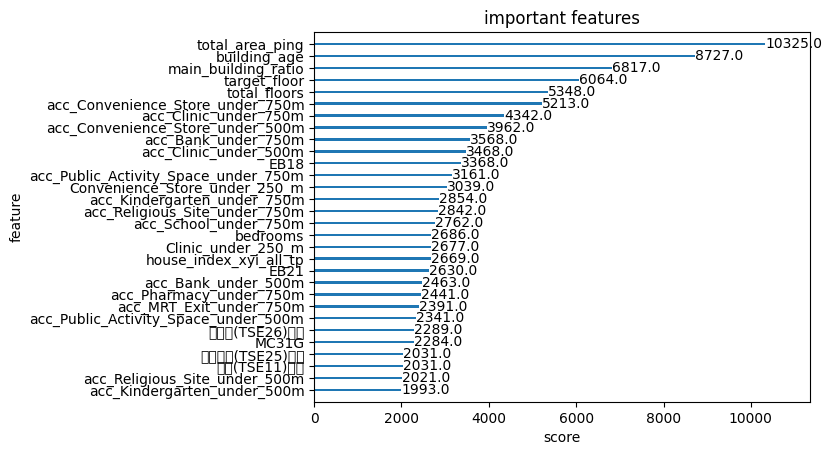

In [60]:
xgboost.plot_importance(best_model, max_num_features=30 , title='important features', xlabel='score', ylabel='feature', grid=False)

## 模型解釋性 SHAP (深度學習也可以用喔)

In [61]:
!pip install shap matplotlib

In [62]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [63]:
import matplotlib

In [64]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(best_model)

# Calculate Shap values
shap_values = explainer.shap_values(X_train)

In [65]:
###############################################################################################################################################################################
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2024-07-11 10:06:43--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.132.138, 74.125.132.101, 74.125.132.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.132.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-07-11 10:06:43--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.132.132, 2607:f8b0:4001:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.132.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M   129MB/s    in 0.2s    

2024-07-11 10:06:

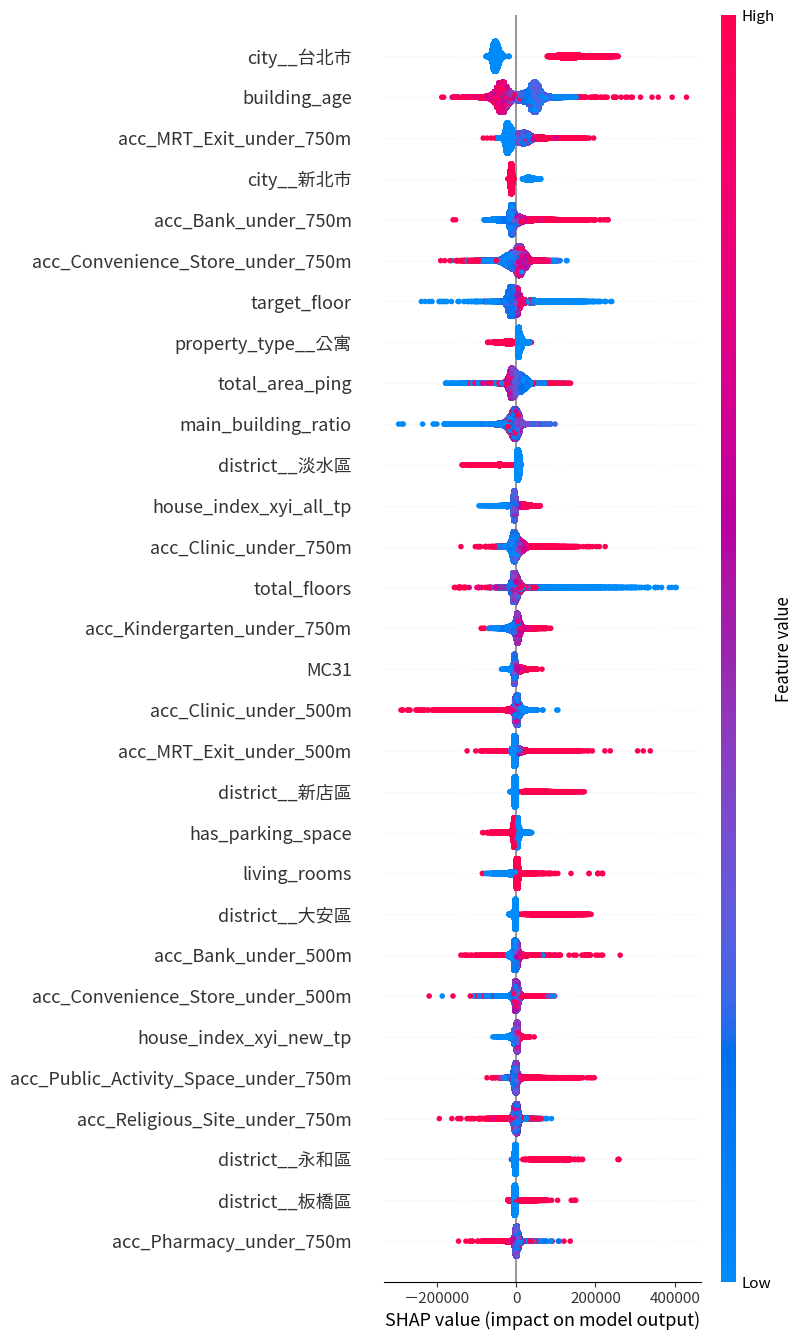

In [66]:
# Make plot. Index of [1] is explained in text below.
# 此圖的顏色(軸)代表的是特徵實際值的大小
shap.summary_plot(shap_values[:, :], X_train, max_display=30)

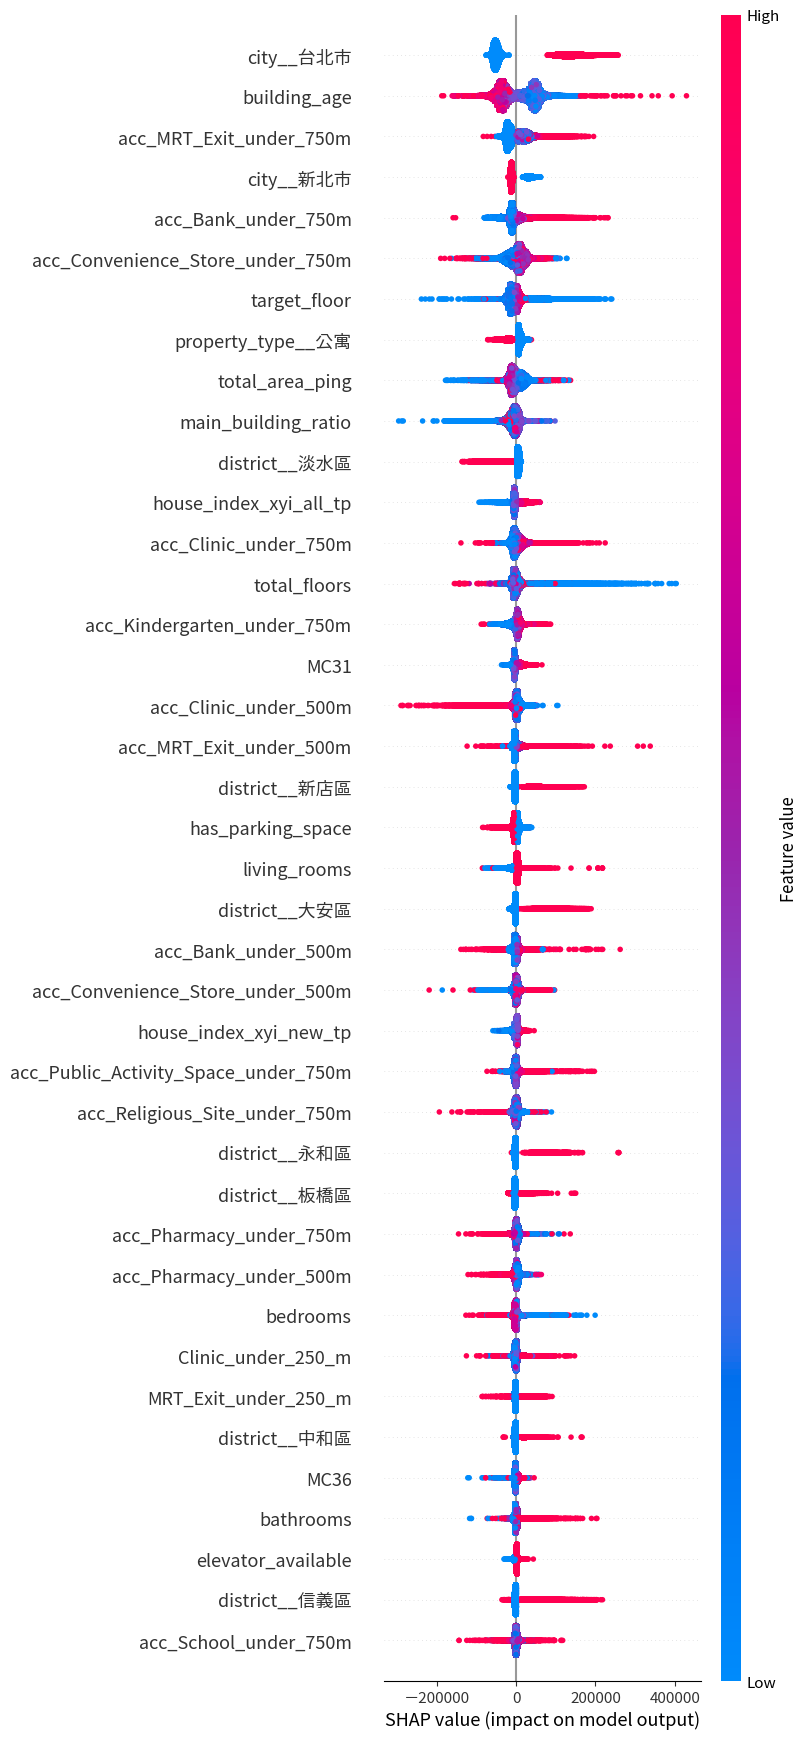

In [67]:
shap.summary_plot(shap_values[:, :], X_train, max_display=40)

In [68]:
# X_train.info(max_cols=155)

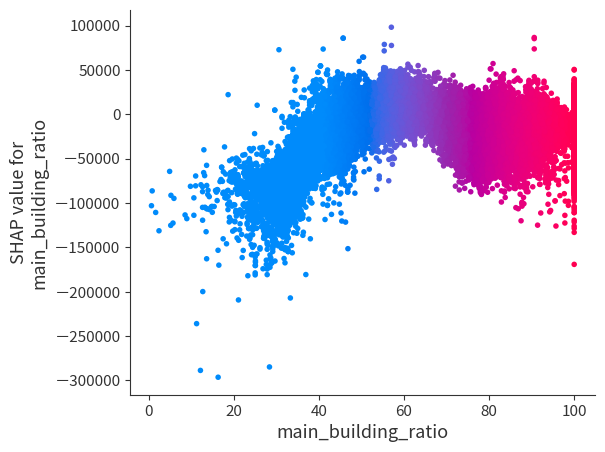

In [69]:
# 第一個參數位置為被選取的"主要特徵"
# 橫軸為: 為主要特徵的實際數值
# 縱軸為: 主要特徵之shap value的值 (正的就是對預測值y有正面影響，反之負面影響)
# interaction_index 是與主要特徵互動之"次要特徵"，會以"顏色表示"其特徵值大小

shap.dependence_plot('main_building_ratio', shap_values[:,:], X_train, interaction_index="main_building_ratio")